In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


In [3]:
import cv2
# load the datasets 
parasitized_data = os.listdir("F:/Practice/cell_images/Parasitized/")
uninfected_data = os.listdir("F:/Practice/cell_images/Uninfected/")

data = []
labels = []

for img in parasitized_data:
    try:
        read_img = plt.imread("F:/Practice/cell_images/Parasitized/" + "/" + img)
        resized_img = cv2.resize(read_img, (50,50))
        img_array = img_to_array(resized_img)
        data.append(img_array)
        labels.append(1)
    except:
        None

for img2 in uninfected_data:
    try:
        read_img = plt.imread("F:/Practice/cell_images/Uninfected/" + "/" + img2)
        resized_img = cv2.resize(read_img, (50,50))
        img_array = img_to_array(resized_img)
        data.append(img_array)
        labels.append(0)
    except:
        None
        

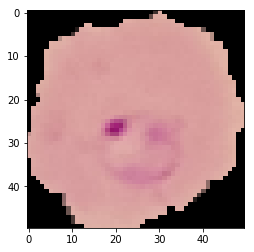

In [4]:
plt.imshow(data[0])
plt.show()

In [5]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [6]:
# total number of images and labels
print("Total number of images: ", len(image_data))
print("Total number of labels: ", len(labels))

Total number of images:  27557
Total number of labels:  27557


In [7]:
from sklearn.model_selection import train_test_split
# split the data
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)
print("Number of train images: ", len(x_train))
print("Number of test images: ", len(x_test))
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

Number of train images:  22045
Number of test images:  5512


In [8]:
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False, subset="training")
val_generator = train_datagen.flow(x_train, y_train, batch_size = 32, shuffle = False, subset="validation")

In [9]:
train_generator

In [10]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers
    

In [11]:
# build CNN model
def my_CNN(height, width, channel, classes):
    model = Sequential()
    
    inputShape = (height, width, channel)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channel, height, width)
        
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model
    

In [12]:
#instantiate the model
height = 50
width = 50
classes = 2
channel = 3
model = my_CNN(height = height, width = width, classes = classes, channel = channel)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [13]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [ ]:
#fit the model on the augmented dataset
history = model.fit_generator(train_generator, validation_data = val_generator, 
                              validation_steps = len(x_train) // val_generator.batch_size, 
                              steps_per_epoch = len(x_train) // 64, epochs = 5, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10


In [ ]:
plt.figure(figsize = (18,8))
plt.plot(range(20), history.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), history.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
